In [280]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import os
from scipy.integrate import solve_ivp
%matplotlib inline
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import pandas as pd
import random
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
#this next line is only needed in iPython notebooks
%matplotlib inline 
import math
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
font = fm.FontProperties(family = 'Gill Sans', fname = '/Library/Fonts/GillSans.ttc', size = 12)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
def hide_spines(intx=False,inty=False):
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in matplotlib._pylab_helpers.Gcf.get_all_fig_managers()]
    if (plt.gca().get_legend()):
        plt.setp(plt.gca().get_legend().get_texts(), fontproperties=font) 
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')
           # ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
            for label in ax.get_xticklabels() :
                label.set_fontproperties(font)
            for label in ax.get_yticklabels() :
                label.set_fontproperties(font)
            #ax.set_xticklabels(ax.get_xticks(), fontproperties = font)
            ax.set_xlabel(ax.get_xlabel(), fontproperties = font)
            ax.set_ylabel(ax.get_ylabel(), fontproperties = font)
            ax.set_title(ax.get_title(), fontproperties = font)
            if (inty):
                ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
            if (intx):
                ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%d'))
def show(nm,a=0,b=0,show=1):
    hide_spines(a,b)
    #ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    #plt.yticks([1,1e-2,1e-4,1e-6,1e-8,1e-10,1e-12], labels)
    #ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda v,_: ("10$^{%d}$" % math.log(v,10)) ))
    if (len(nm)>0):
        plt.savefig(nm,bbox_inches='tight');
    if show:
        plt.show()
    else:
        plt.close()

2.0.0-beta1


The equation for the damped pendulum is $$ \ell {\ddot {\theta }}-g\sin \theta ={\ddot {x}}\cos \theta$$ $$\left(M+m\right){\ddot {x}}-m\ell {\ddot {\theta }}\cos \theta +m\ell {\dot {\theta }}^{2}\sin \theta =F$$
Defining $y(t) = \dot{\theta}(t)$ and $z(t)=\dot{x}(t)$, we get the system
$$ \dot{y}(t) = \frac{g}{\ell}\sin \theta +{\dot{z}}\cos \theta,$$
$$ \theta'(t) = y(t).$$

In [1]:
def run_step(f,state):
    #data is theta-dot, theta, x-dot,x
    fabs = np.min([math.fabs(f),100])
    f = f/(math.fabs(f)+1e-14)*fabs
    #print(f,fabs)
    A11 = lambda t,x: 1.5*((M+m)*g-0.5*m*L*x[0]**2*math.cos(x[1]))/(L*(M+m*(1-0.75*math.cos(x[1])**2)))
    A12 = lambda t,x: -1/5*math.cos(x[1])/(L*(M+m*(1-0.75*math.cos(x[1])**2)))
    A21 = lambda t,x: 1.5*(0.5*m*L*x[0]**2 - 0.75*m*g*math.cos(x[1]))/((M+m*(1-0.75*math.cos(x[1])**2)))
    A22 = lambda t,x: 1.5/((M+m*(1-0.75*math.cos(x[1])**2)))

    RHS = lambda t,x: [1/(L*(M+m*math.sin(x[1])**2))* (-f * math.cos(x[1]) - m*L*x[0]**2*math.cos(x[1])*math.sin(x[1])-
                                                     (M+m)*g*math.sin(x[1])),
                      x[0],
                      1/(M+m*math.sin(x[1])**2)* (f + m*math.sin(x[1])*(L*x[0]**2+g*math.cos(x[1]))),
                      x[2]]

    m = 1.
    M = 1.
    g = 9.81
    L = 1.
    rew = lambda x: 1.0/((np.pi-np.abs(x[1]))**4+1e-4) - 0*5*x[3]**2 
    init_reward = rew(state) #-np.log(np.sum(np.diff(solution.t) * np.abs(solution.y[1,1:])))
    
    solution = solve_ivp(fun=RHS, y0=state, t_span=[0,1.0/32.0], max_step=0.001, method="RK45")
    reward = rew(solution.y[:,-1]) #-np.log(np.sum(np.diff(solution.t) * np.abs(solution.y[1,1:])))
    return reward-0*init_reward+10*(np.cos(math.pi-solution.y[1,-1])>-0.5*L), solution.y[:,-1]

In [2]:
rew,state = run_step(1,[0,math.pi-1e-2,0,0])

print(rew,state)


NameError: name 'math' is not defined

In [3]:
model = tf.keras.Sequential()
ksize = 3
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Dense(6, activation='relu', input_shape=(4,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.summary()

NameError: name 'tf' is not defined

In [298]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['MAE'])

In [ ]:
cases = 15
cases_per_epoch = 20
st = 200
rnds = np.logspace(0,-2,cases)
for i in range(cases):
    for j in range(cases_per_epoch):
        if (j==0) and (i==0):
            moves,states,rewards = run_case(rand=rnds[i],steps=st)
        else:
            movetmp, st_tmp, rew_tmp = run_case(rand=rnds[i],steps=st)
            moves = np.vstack([moves,movetmp])
            states = np.vstack([states,st_tmp])
            rewards = np.vstack([rewards,rew_tmp])
    print(moves.shape)
    adjusted_rewards = rewards - np.mean(rewards)
    adjusted_rewards /= np.std(rewards) + 1e-10
    model.fit(x=states, y=moves, sample_weight=adjusted_rewards.reshape(-1), epochs=20, batch_size=st, shuffle=True)
    


(3980, 3)
Train on 3980 samples
Epoch 1/20
3980/3980 [==============================] - 0s 99us/sample - loss: 0.0376 - MAE: 0.4390
Epoch 2/20
3980/3980 [==============================] - 0s 6us/sample - loss: 0.0245 - MAE: 0.4399
Epoch 3/20
3980/3980 [==============================] - 0s 5us/sample - loss: 0.0151 - MAE: 0.4395
Epoch 4/20
3980/3980 [==============================] - 0s 5us/sample - loss: -0.0013 - MAE: 0.4399
Epoch 5/20
3980/3980 [==============================] - 0s 5us/sample - loss: -0.0056 - MAE: 0.4392
Epoch 6/20
3980/3980 [==============================] - 0s 5us/sample - loss: -0.0098 - MAE: 0.4402
Epoch 7/20
3980/3980 [==============================] - 0s 5us/sample - loss: -0.0157 - MAE: 0.4407
Epoch 8/20
3980/3980 [==============================] - 0s 5us/sample - loss: -0.0202 - MAE: 0.4400
Epoch 9/20
3980/3980 [==============================] - 0s 5us/sample - loss: -0.0308 - MAE: 0.4403
Epoch 10/20
3980/3980 [==============================] - 0s 5us/sample

In [276]:
model.save_weights("inverse_pendulum_long_train")
model.load_weights("inverse_pendulum_long_train")
model.weights

[<tf.Variable 'dense_67/kernel:0' shape=(4, 6) dtype=float32, numpy=
 array([[ 3.8130894e-01, -9.7763158e-02, -2.5588840e-01, -6.9203288e-03,
         -6.7336810e-01, -6.9853812e-01],
        [-1.5880209e+00, -1.6990411e-01,  1.7753033e-01, -5.3755068e-03,
         -2.5009928e+00,  1.8503678e+00],
        [ 1.8795781e-02, -1.9459471e-01,  1.3763116e-01, -3.9455529e-02,
          1.2312692e-01, -3.2216311e-02],
        [-1.0408015e-02,  5.0035201e-02, -6.5381691e-02, -3.8093957e-04,
         -2.8034873e-02, -6.6327766e-02]], dtype=float32)>,
 <tf.Variable 'dense_67/bias:0' shape=(6,) dtype=float32, numpy=
 array([-2.127195  , -1.1071606 ,  0.5158574 , -0.35432452, -3.5441222 ,
        -2.7789624 ], dtype=float32)>,
 <tf.Variable 'dense_68/kernel:0' shape=(6, 3) dtype=float32, numpy=
 array([[-3.3621936 , -3.3195407 , -3.3169672 ],
        [-0.599801  , -0.4991498 , -0.5226726 ],
        [-0.70478255, -0.4971323 , -0.28486183],
        [-0.2626616 , -0.27729398, -0.25830153],
        [-2

In [277]:
def display_series(state):
    for step in range(10):
        f, state = run_step(model.predict(state.reshape((1,4))),state)
        print(model.predict(state.reshape((1,4))))
        plt.plot(step,state[1],'bo')

In [278]:
display_series(np.array([0,0.001,0,0]))

TypeError: only size-1 arrays can be converted to Python scalars

-4.588067334974153 0.0


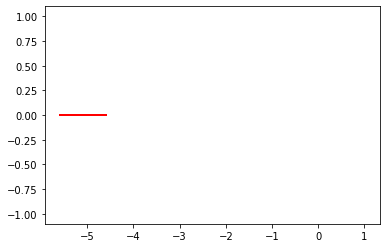

In [294]:
vals = np.array([-10.,0.,10.])
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True)
g = 9.81
import matplotlib.patches as patches
moves,states,rewards = run_case(rand=0,init_val=np.array([0,0,0,0]),steps=100)
xmin = np.min(states[:,-1])
xmax = np.max(states[:,-1])
print(xmin,xmax)

line, = ax.plot([], [], 'o-', lw=2)
linem, = ax.plot([], [], 'r-', lw=2)

def init():
    #ax.axis("equal")
    #ax.set_ylim(-0.5,1)
    #ax.set(xlim=(0, 100), ylim=(-0.5, 2))
    line.set_data([], [])
    return line,

def update(frame):
    line.set_data([states[frame,-1],np.sin(math.pi-states[frame,1])+states[frame,-1]], [0,np.cos(math.pi-states[frame,1])])
    linem.set_data([states[frame,-1],states[frame,-1]+vals[np.argmax(moves[frame])]/10],[0,0])
    ax.plot([xmin-1,xmax+1],[0,0],alpha=0)
    ax.plot([xmin-1,xmax+1],[1,1],alpha=0)
    ax.plot([xmin-1,xmax+1],[-1,-1],alpha=0)
    ax.relim()
    ax.autoscale_view()
    return line,

ani = FuncAnimation(fig, update, frames=range(moves.shape[0]),
                    init_func=init, blit=False)

from IPython.display import HTML
HTML(ani.to_html5_video())

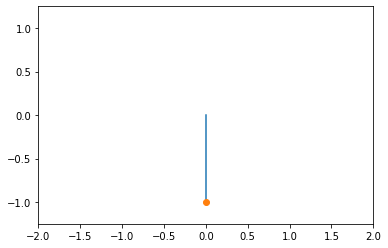

What force? (q for done)-100


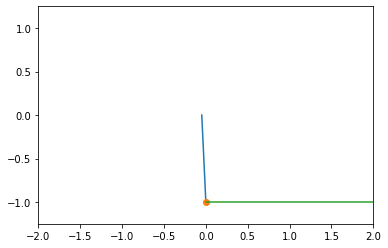

What force? (q for done)-100


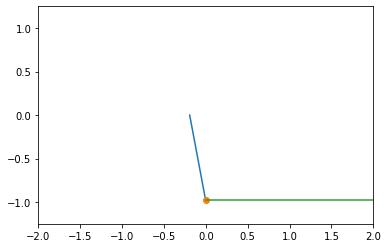

What force? (q for done)0


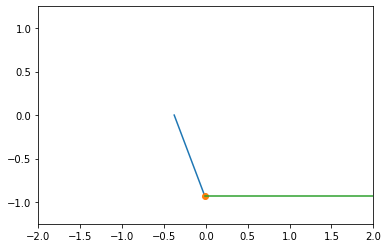

What force? (q for done)0


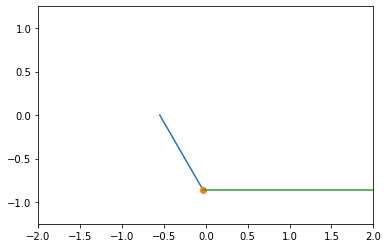

What force? (q for done)0


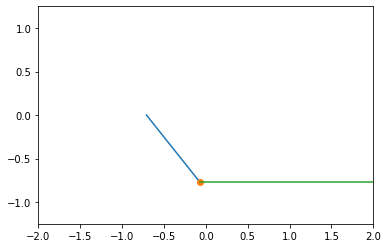

What force? (q for done)q


In [628]:
vals = np.array([-10.,0.,10.])
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=True)
g = 9.81
import matplotlib.patches as patches
state = 0*np.array([0,-math.pi-0.1,0,0])
done = 0
while not(done):
    plt.plot([state[-1],np.sin(math.pi-state[1])+state[-1]], [0,np.cos(math.pi-state[1])])
    plt.plot([np.sin(math.pi-state[1])+state[-1]], [np.cos(math.pi-state[1])],'o')
    plt.plot([np.sin(math.pi-state[1])+state[-1],np.sin(math.pi-state[1])+state[-1]+state[0]], 
             [np.cos(math.pi-state[1]),np.cos(math.pi-state[1])],'-')
    plt.axis([-2,2,-1.25,1.25])
    plt.show()
    val = input("What force? (q for done)")
    if (val=="q"):
        done = 1
    else:
        reward,state = run_step(float(val),state)


In [486]:
run_step(0,np.array([0,-math.pi+0.0001,0,0]))

(-0.01909928403476968,
 array([ 6.15084798e-05, -3.14149169e+00,  3.07542397e-05,  4.79769203e-07]))

In [234]:
print(moves,rewards)

[[5.74728425e-08 1.05336184e-07 9.99999881e-01]
 [1.98787991e-08 3.76818399e-08 1.00000000e+00]
 [9.98844563e-09 1.95302228e-08 1.00000000e+00]
 [6.50486376e-09 1.30294264e-08 1.00000000e+00]
 [5.01707698e-09 1.02183737e-08 1.00000000e+00]
 [4.29956737e-09 8.85023432e-09 1.00000000e+00]
 [3.92577748e-09 8.13222023e-09 1.00000000e+00]
 [3.72039777e-09 7.73494868e-09 1.00000000e+00]
 [3.60257824e-09 7.50543983e-09 1.00000000e+00]
 [3.53217722e-09 7.36728012e-09 1.00000000e+00]
 [3.48829721e-09 7.28054594e-09 1.00000000e+00]
 [3.45973183e-09 7.22368165e-09 1.00000000e+00]
 [3.44030004e-09 7.18476700e-09 1.00000000e+00]
 [3.42655437e-09 7.15709758e-09 1.00000000e+00]
 [3.41645201e-09 7.13670500e-09 1.00000000e+00]
 [3.40885586e-09 7.12131243e-09 1.00000000e+00]
 [3.40301565e-09 7.10946457e-09 1.00000000e+00]
 [3.39847528e-09 7.10023595e-09 1.00000000e+00]
 [3.39492501e-09 7.09299419e-09 1.00000000e+00]
 [3.39214812e-09 7.08730097e-09 1.00000000e+00]
 [3.38996209e-09 7.08278725e-09 1.000000

In [242]:
model.predict(states[0:1,:])

array([[0.2954557 , 0.30031377, 0.40423054]], dtype=float32)

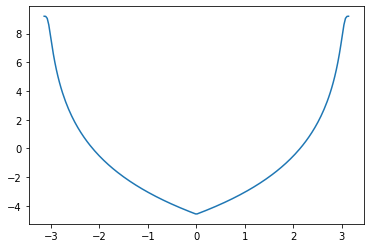

In [186]:
theta = np.linspace(-np.pi,np.pi,200)
plt.plot(theta,-np.log((np.pi-np.abs((theta)))**4 + 1e-4))

In [6]:
import pyDOE

In [10]:
pyDOE.lhs(4,samples=64, criterion="maximin")*0.4+0.8

array([[0.95252958, 1.02554616, 0.96724666, 1.11254449],
       [0.87575231, 1.16173335, 1.14289694, 1.07584874],
       [1.03062109, 0.98488448, 0.93539221, 0.90101826],
       [0.85365657, 0.99472409, 0.8581207 , 1.14240262],
       [1.12262237, 0.96889586, 0.8114492 , 0.83514476],
       [1.19443641, 0.85708485, 0.87895174, 0.99278747],
       [0.9567126 , 0.8169089 , 0.97314977, 0.8991492 ],
       [0.96821039, 1.05292669, 1.12774551, 1.03800779],
       [0.94107511, 1.04639937, 1.19794126, 1.12881077],
       [0.88161331, 0.83347558, 0.91414927, 0.83785056],
       [1.01918515, 1.10644018, 0.98370934, 0.8175587 ],
       [1.07717147, 0.96688888, 1.10569572, 0.87856112],
       [0.87088919, 1.12479476, 0.90734452, 1.144941  ],
       [0.9439458 , 0.85170265, 0.9308593 , 1.00066189],
       [0.97969744, 1.01444999, 1.0650034 , 0.84766071],
       [1.08758174, 0.82443645, 0.83551078, 1.10045333],
       [1.10097653, 0.82560199, 0.85454447, 0.89110995],
       [1.1380909 , 0.94997355,